In [1]:
import sys
assert sys.version_info >= (3, 7)

In [2]:
from packaging import version
import sklearn
assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

Download data 
here i am using kaggle dataset india house prediction
https://www.kaggle.com/datasets/ankushpanday1/india-house-price-prediction/data

In [3]:
from pathlib import Path
import pandas as pd
import urllib.request

def load_housing_data():
    csv_path = Path("datasets/train.csv")
    if not csv_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://raw.githubusercontent.com/izaanz/ML-Indian-House-Prediction/main/data/india_housing_prices.csv"
        urllib.request.urlretrieve(url, csv_path)
    return pd.read_csv(csv_path)


In [4]:
housing = load_housing_data()

In [5]:
housing.head()

,ID,State,City,Locality,Property_Type,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,...,Age_of_Property,Nearby_Schools,Nearby_Hospitals,Public_Transport_Accessibility,Parking_Space,Security,Amenities,Facing,Owner_Type,Availability_Status
0,1,Tamil Nadu,Chennai,Locality_84,Apartment,1.0,4740.0,489.76,0.10,1990.0,...,35.0,10.0,3.0,High,No,No,"Playground, Gym, Garden, Pool, Clubhouse",West,Owner,Ready_to_Move
1,2,Maharashtra,Pune,Locality_490,Independent House,3.0,2364.0,195.52,0.08,2008.0,...,17.0,8.0,1.0,Low,No,Yes,"Playground, Clubhouse, Pool, Gym, Garden",North,Builder,Under_Construction
2,3,Punjab,Ludhiana,Locality_167,Apartment,2.0,3642.0,183.79,0.05,1997.0,...,28.0,9.0,8.0,Low,Yes,No,"Clubhouse, Pool, Playground, Gym",South,Broker,Ready_to_Move
3,4,Rajasthan,Jodhpur,Locality_393,Independent House,2.0,2741.0,300.29,0.11,1991.0,...,34.0,5.0,7.0,High,Yes,Yes,"Playground, Clubhouse, Gym, Pool, Garden",North,Builder,Ready_to_Move
4,5,Rajasthan,Jaipur,Locality_466,Villa,4.0,4823.0,182.90,0.04,2002.0,...,23.0,4.0,9.0,Low,No,Yes,"Playground, Garden, Gym, Pool, Clubhouse",East,Builder,Ready_to_Move


In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138199 entries, 0 to 138198
Data columns (total 23 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID                              138199 non-null  int64  
 1   State                           138199 non-null  object 
 2   City                            138199 non-null  object 
 3   Locality                        138199 non-null  object 
 4   Property_Type                   138198 non-null  object 
 5   BHK                             138198 non-null  float64
 6   Size_in_SqFt                    138198 non-null  float64
 7   Price_in_Lakhs                  138198 non-null  float64
 8   Price_per_SqFt                  138198 non-null  float64
 9   Year_Built                      138198 non-null  float64
 10  Furnished_Status                138198 non-null  object 
 11  Floor_No                        138198 non-null  float64
 12  Total_Floors    

In [7]:
housing["Facing"].value_counts()

Facing
West     34746
East     34562
North    34481
South    34409
Name: count, dtype: int64

In [8]:
housing.describe()

,ID,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,Floor_No,Total_Floors,Age_of_Property,Nearby_Schools,Nearby_Hospitals
count,138199.000000,138198.000000,138198.000000,138198.000000,138198.000000,138198.000000,138198.000000,138198.000000,138198.000000,138198.000000,138198.000000
mean,69100.000000,3.001729,2753.336474,255.035077,0.130706,2006.501599,14.973900,15.489631,18.498401,5.502482,5.492952
std,39894.759263,1.418976,1300.370830,141.343457,0.130841,9.797479,8.955616,8.666417,9.797479,2.880384,2.875496
min,1.000000,1.000000,500.000000,10.000000,0.000000,1990.000000,0.000000,1.000000,2.000000,1.000000,1.000000
25%,34550.500000,2.000000,1627.000000,132.900000,0.050000,1998.000000,7.000000,8.000000,10.000000,3.000000,3.000000
50%,69100.000000,3.000000,2751.000000,255.060000,0.090000,2006.000000,15.000000,15.000000,19.000000,6.000000,5.000000
75%,103649.500000,4.000000,3879.000000,377.190000,0.160000,2015.000000,23.000000,23.000000,27.000000,8.000000,8.000000
max,138199.000000,5.000000,5000.000000,500.000000,0.990000,2023.000000,30.000000,30.000000,35.000000,10.000000,10.000000


In [9]:
IMAGES_PATH = Path() / "images" / "end_to_end_project"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

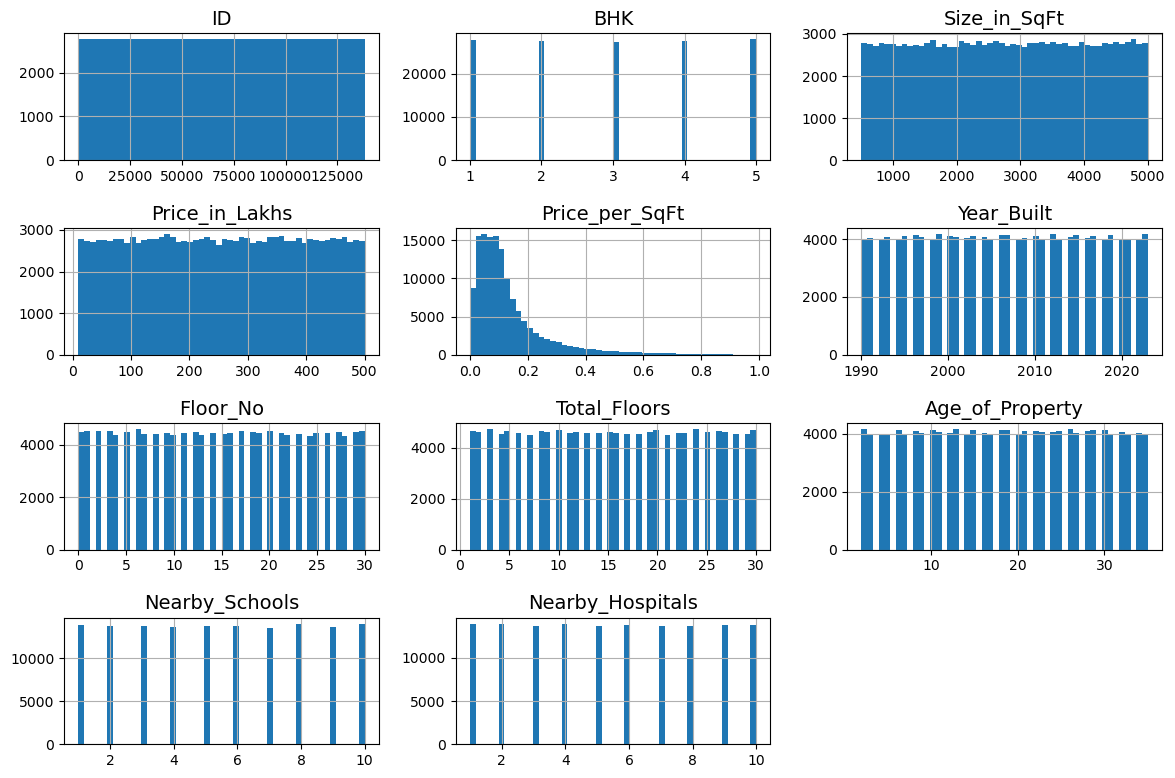

In [10]:
import matplotlib.pyplot as plt

# extra code – the next 5 lines define the default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

housing.hist(bins=50, figsize=(12, 8))
save_fig("attribute_histogram_plots")  # extra code
plt.show()

create a test set

In [11]:
import numpy as np

def shuffle_and_split_data(data, test_ratio):
    # Generate a random permutation of indices from 0 to len(data)-1
    shuffled_indices = np.random.permutation(len(data))
    
    # Calculate the number of samples in the test set
    test_set_size = int(len(data) * test_ratio)
    
    # Select first test_set_size indices for test dataset
    test_indices = shuffled_indices[:test_set_size]
    
    # Remaining indices for training set
    train_indices = shuffled_indices[test_set_size:]
    
    # Return the corresponding data splits
    return data.iloc[train_indices], data.iloc[test_indices]


In [12]:
train_set, test_set = shuffle_and_split_data(housing, 0.2) #test ratio can be change , try differ ratio to get differ outcomes 
len(train_set)

110560

In [13]:
len(test_set)

27639

In [14]:
np.random.seed(42)

In [15]:
train_set.head()

,ID,State,City,Locality,Property_Type,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,...,Age_of_Property,Nearby_Schools,Nearby_Hospitals,Public_Transport_Accessibility,Parking_Space,Security,Amenities,Facing,Owner_Type,Availability_Status
51299,51300,Assam,Guwahati,Locality_465,Independent House,4.0,4482.0,421.61,0.09,2023.0,...,2.0,4.0,9.0,Medium,No,No,Gym,West,Builder,Ready_to_Move
108727,108728,Gujarat,Surat,Locality_200,Villa,4.0,2889.0,310.35,0.11,2001.0,...,24.0,3.0,9.0,Low,Yes,Yes,"Garden, Pool, Clubhouse, Gym",East,Broker,Under_Construction
93762,93763,Tamil Nadu,Coimbatore,Locality_358,Apartment,3.0,4173.0,57.50,0.01,2004.0,...,21.0,4.0,9.0,Medium,Yes,Yes,"Clubhouse, Playground",South,Builder,Under_Construction
124478,124479,Madhya Pradesh,Bhopal,Locality_100,Independent House,2.0,4274.0,21.62,0.01,2016.0,...,9.0,8.0,2.0,Medium,Yes,Yes,"Clubhouse, Playground, Gym",West,Broker,Under_Construction
65662,65663,Bihar,Patna,Locality_413,Apartment,2.0,933.0,367.85,0.39,2010.0,...,15.0,3.0,7.0,High,No,Yes,"Gym, Garden, Pool, Clubhouse, Playground",North,Builder,Ready_to_Move


the CRC32 hash function from Python's zlib library to create a stable, deterministic split of the dataset based on an identifier column. This approach is useful to ensure that the same sample always ends up in the train or test set across multiple runs or dataset updates.

In [16]:
from zlib import crc32

def is_id_in_test_set(identifier, test_ratio):
    return crc32(np.int64(identifier)) < test_ratio * 2**32

def split_data_with_id_hash(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: is_id_in_test_set(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [17]:
housing["id"] = (housing["ID"].astype(str) + "_" +
                 housing["State"].astype(str) + "_" +
                 housing["City"].astype(str) + "_" +
                 housing["Locality"].astype(str) + "_" +
                 housing["Property_Type"].astype(str) + "_" +
                 housing["BHK"].astype(str) + "_" +
                 housing["Size_in_SqFt"].astype(str)
                ).apply(hash)


In [18]:
train_set, test_set = split_data_with_id_hash(housing, 0.2, "id")

In [19]:
from zlib import crc32
import numpy as np
import pandas as pd

# Function to check if id belongs to test set based on hash
def is_id_in_test_set(identifier, test_ratio):
    return crc32(np.int64(identifier)) < test_ratio * 2**32

# Function to split data using id hash
def split_data_with_id_hash(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: is_id_in_test_set(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

# Create unique stable ID for each row by combining key columns and hashing
housing["id"] = (housing["ID"].astype(str) + "_" +
                 housing["State"].astype(str) + "_" +
                 housing["City"].astype(str) + "_" +
                 housing["Locality"].astype(str) + "_" +
                 housing["Property_Type"].astype(str) + "_" +
                 housing["BHK"].astype(str) + "_" +
                 housing["Size_in_SqFt"].astype(str)).apply(hash)

# Split dataset into train and test with 20% test size based on id hashes
train_set, test_set = split_data_with_id_hash(housing, 0.2, "id")

# Check split sizes
print(f"Train set size: {len(train_set)}")
print(f"Test set size: {len(test_set)}")


Train set size: 110384
Test set size: 27815


In [20]:
numeric_cols = train_set.select_dtypes(include=["number"]).columns
corr_matrix = train_set[numeric_cols].corr()



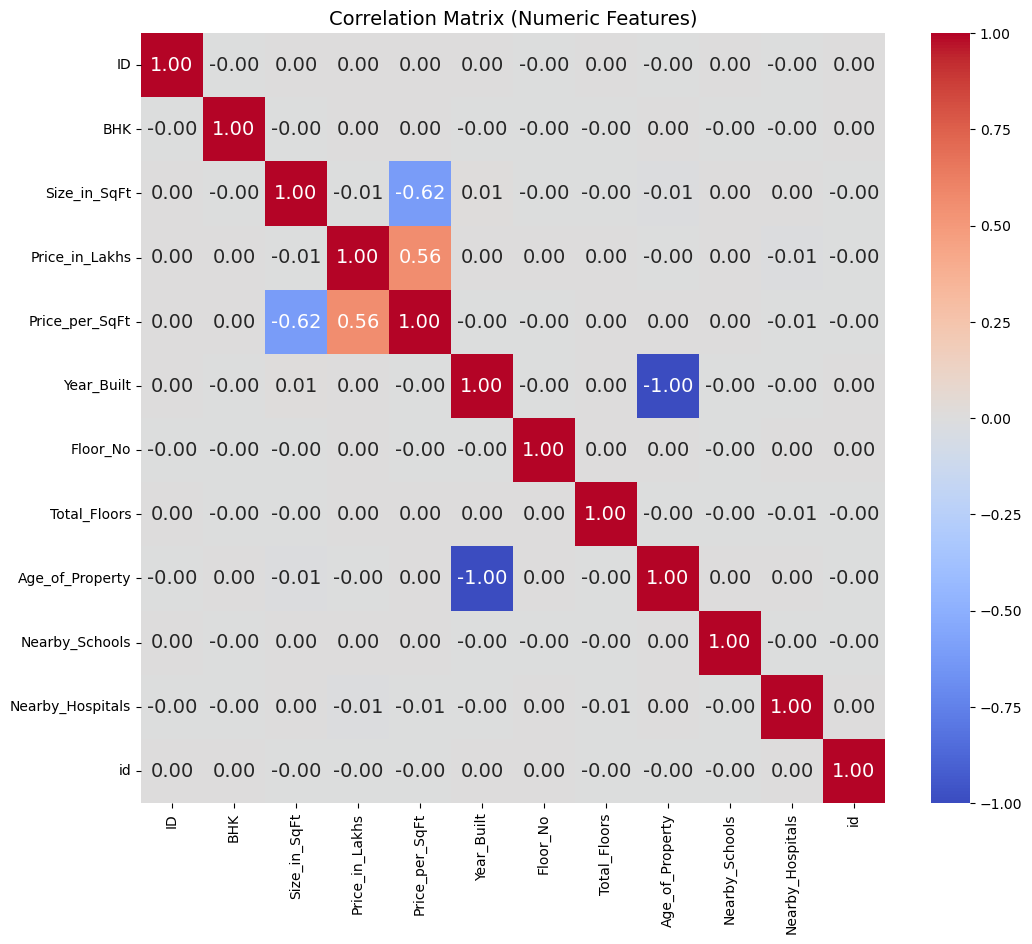

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix (Numeric Features)")
plt.show()


In [22]:
print(corr_matrix["Price_in_Lakhs"].sort_values(ascending=False))


Price_in_Lakhs      1.000000
Price_per_SqFt      0.555577
Year_Built          0.002915
ID                  0.002654
BHK                 0.001846
Total_Floors        0.001444
Floor_No            0.000827
Nearby_Schools      0.000110
id                 -0.001125
Age_of_Property    -0.002915
Size_in_SqFt       -0.005962
Nearby_Hospitals   -0.009396
Name: Price_in_Lakhs, dtype: float64


In [23]:
from sklearn.impute import SimpleImputer

num_cols = housing.select_dtypes(include=["number"]).columns
cat_cols = housing.select_dtypes(include=["object"]).columns

num_imputer = SimpleImputer(strategy="median")
cat_imputer = SimpleImputer(strategy="most_frequent")

housing[num_cols] = num_imputer.fit_transform(housing[num_cols])
housing[cat_cols] = cat_imputer.fit_transform(housing[cat_cols])


In [24]:
housing_encoded = pd.get_dummies(housing, columns=cat_cols)


In [25]:
X = housing_encoded.drop(columns=["Price_in_Lakhs", "id"])
y = housing_encoded["Price_in_Lakhs"]


In [26]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Split dataset into features and target
X = housing.drop(columns=["Price_in_Lakhs", "id"])
y = housing["Price_in_Lakhs"]

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Select numeric and categorical columns
numeric_features = X_train.select_dtypes(include=['number']).columns.tolist()
categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()

# Numeric pipeline: median imputer
numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
])

# Categorical pipeline: most frequent imputer + one-hot encoder
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Full preprocessing pipeline
preprocessor = ColumnTransformer([
    ('num', numeric_pipeline, numeric_features),
    ('cat', categorical_pipeline, categorical_features)
])


In [27]:
model_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(random_state=42))
])


In [28]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

numeric_features = X_train.select_dtypes(include=["number"]).columns.tolist()
categorical_features = X_train.select_dtypes(include=["object"]).columns.tolist()

numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore')),
])

preprocessor = ColumnTransformer([
    ("num", numeric_pipeline, numeric_features),
    ("cat", categorical_pipeline, categorical_features),
])


In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline

model_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42, n_jobs=-1)),
])


In [30]:
model_pipeline.fit(X_train, y_train)


KeyboardInterrupt: 